In [1]:
# importing library
import pandas as pd
import numpy as np

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# import warning library
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Getting dataset
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# checking dimension
data.shape            

(8425, 23)

In [4]:
# Checking information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
Here our Label will be RainTomorrow

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.
Here our Label will be Rainfall.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".




We can observe here that it consist of two types of columns: categorical and numerical.
* Categorical columns are those which has object type of data.
* Numerical columns has float64 type of data, we can call them continuous data as well.

We can also observe that our dataset has some null values.

In [6]:
# chceking for null values
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

We can observe that except Date and Location, every single column has missing values.

Let's check the rows with RainTomorrow null values.

In [7]:
# Chceking the rows where RainTomorrow has Null value
data[data['RainTomorrow'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,2014-11-07,Adelaide,16.8,36.6,0.0,6.6,NaN,NW,44.0,NNE,...,14.0,6.0,1013.2,1010.7,NaN,NaN,28.8,35.9,No,NaN
6908,2014-12-05,Adelaide,17.5,24.6,0.0,4.2,NaN,WSW,43.0,S,...,63.0,46.0,1012.6,1010.7,NaN,NaN,18.7,24.3,No,NaN
6909,2014-12-06,Adelaide,16.4,23.7,NaN,NaN,NaN,S,43.0,S,...,63.0,50.0,1012.1,1010.6,NaN,NaN,18.8,21.6,NaN,NaN
6915,2014-12-12,Adelaide,13.9,31.1,0.0,7.2,NaN,ESE,39.0,E,...,46.0,36.0,1018.8,1015.6,NaN,NaN,21.6,29.3,No,NaN


Looks like it is not necessary to have Rainfall and RainTomorrow both has Nan for same data. Let' chcek number of Unique values in each columns

In [8]:
# Chceking number of Uniques value
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [16]:
#Statistical Description
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,2012.102433,6.442136,15.741958
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,2.473137,3.437994,8.787354
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000,1.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,2010.000000,3.000000,8.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,2011.000000,6.000000,16.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,2014.000000,9.000000,23.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000,31.000000


In [10]:
# Description of Categorical columns
data.describe(include= [object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8425,8425,7434,7596,8117,8185,8186
unique,3004,12,16,16,16,2,2
top,2011-01-31,Melbourne,N,N,SE,No,No
freq,5,1622,713,906,813,6195,6195


We can obsrrve that Date column as it is has 3004 unique values(very high cardinality), we need to break this column into day month and year, to use this information in our ML Model building and it will decrease cardinality.




# Feature Engineering

In [11]:
# Coverting Date column into Day Month and year columns. Uding to_datetime pandas feature
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [12]:
data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2


In [13]:
# since we already cover the data required from Date column, we can drop it.
data.drop('Date',axis=1,inplace=True)

data.shape

(8425, 25)

# Handling Missing Values.

In [17]:
# we will impute nan values for categorical columns by mode and can use mean knn imputer for numerical columns

# Handling missing values in Categorical columns.
cat_data=['WindGustDir', 'WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for column in data[cat_data]:
    data[column]=data[column].fillna(data[column].mode()[0])
    
data[cat_data].isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

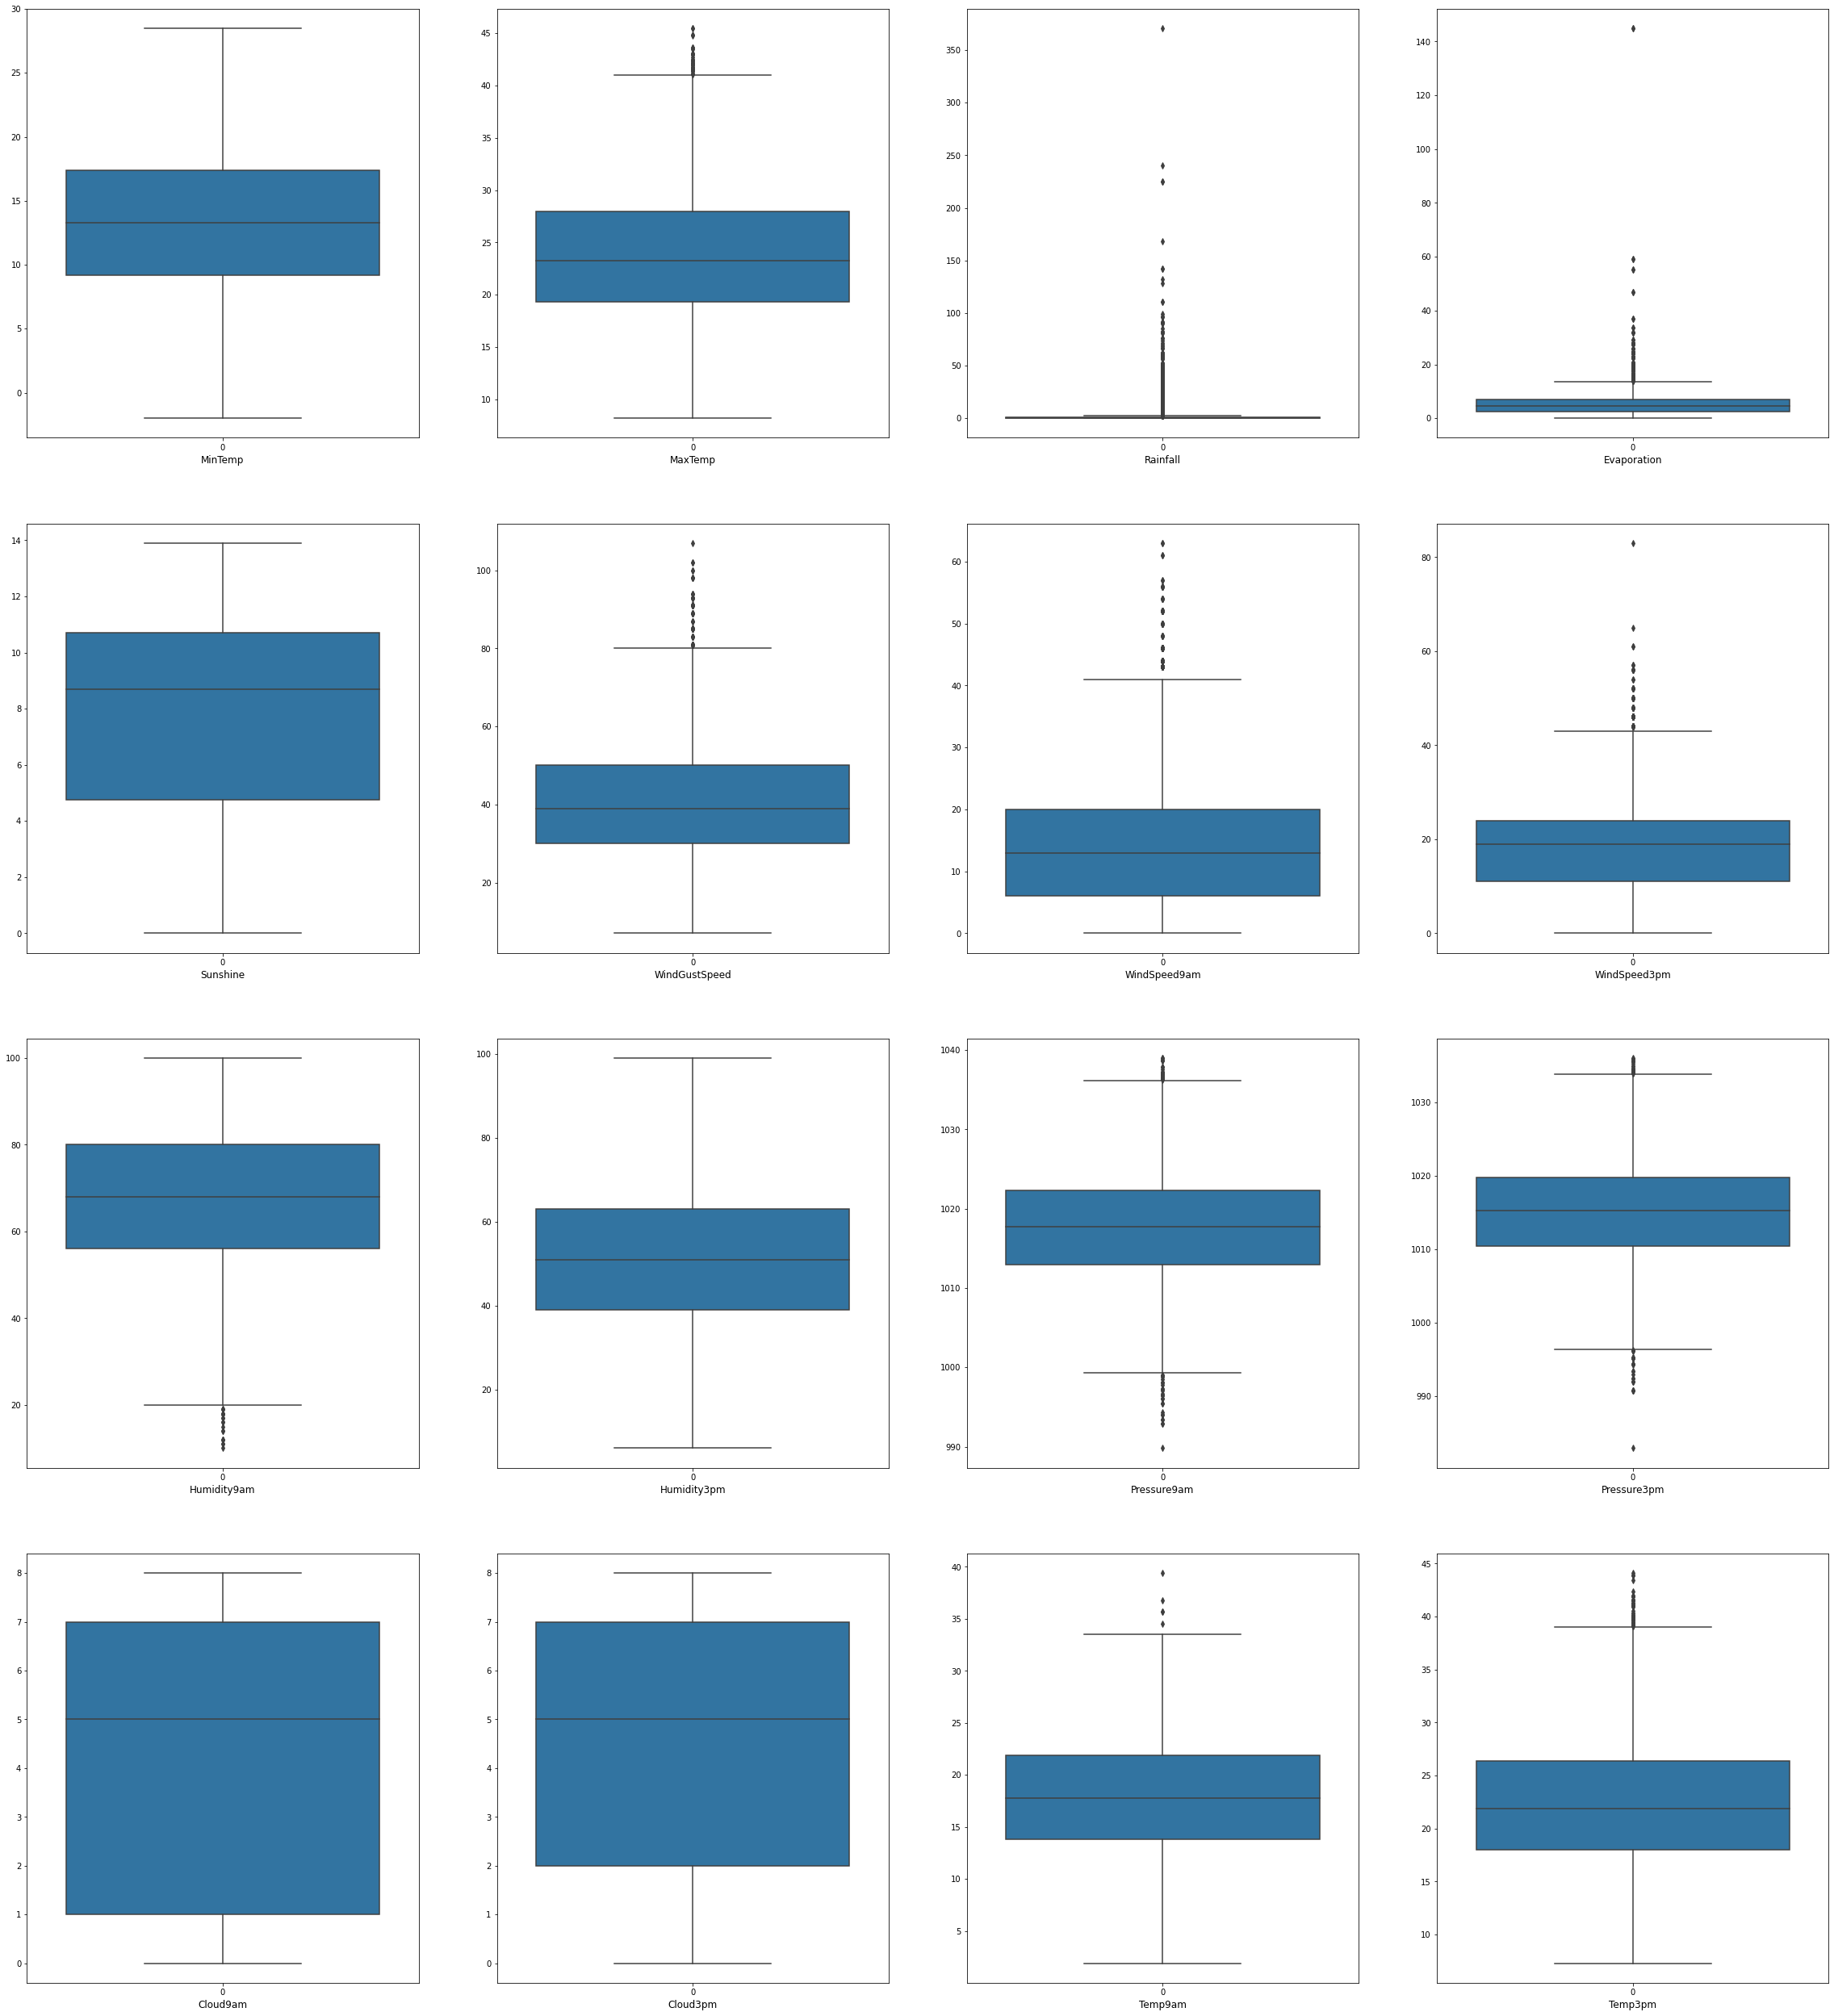

In [19]:
num_data=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed',
          'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
          'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

# Checking for outlier in numerical columns.
# using boxplot

plt.figure(figsize=(40,45))
graph=1
for column in data[num_data]:
    if graph<=16:      #16 denotes total number of columns
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=12)
    graph+=1
plt.show()

We will not touch rainfall here, as it is the target column for one of our model. Before moving ahead, Let's divide or dataset into two groups.

1. Where our label column is Rainfall, It will be a regression model.

2. Model 2 where , our label will be RainTomorrow, it will be a classification Model. For this we can treat all the numerical columns.

In [20]:
# Preparing two data set, since need to make two models going forward
df_reg= data.copy()         
df_clf= data.copy()

print(df_reg.shape)
print(df_clf.shape)

(8425, 25)
(8425, 25)


In [21]:
# For classification model we can treat the whole numerical data columns.
#checking for outlier, using IQR
for feature in df_clf[num_data]:
    q1 = df_clf[feature].quantile(0.25)
    q3 = df_clf[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df_clf.loc[df_clf[feature]<lower_limit,feature] = lower_limit
    df_clf.loc[df_clf[feature]>upper_limit,feature] = upper_limit

In [22]:
# Checking dimension of Classification dataset
df_clf.shape

(8425, 25)

In [23]:
# Impute the numerical columns with their  mean value
for column in df_clf[num_data]:
    df_clf[column]=df_clf[column].fillna(df_clf[column].mean())

#checking for null
df_clf.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

 Looks great, for classification model, our data looks great.
 
 Now let's deal with regression dataset. We need to handle every column except Rainfall column as it is our target column.

In [25]:
# Imputing Null value from numerical data in dataset df_reg

# Let's drop all the rows with Null values in the Rainfall column, As we don't perform analysis in target column.
# specially when it contain continuous data.

df_reg.dropna(axis=0, subset=['Rainfall'], inplace= True)
print(df_reg.isnull().sum())
print(df_reg.shape)




Location            0
MinTemp            50
MaxTemp            45
Rainfall            0
Evaporation      3397
Sunshine         3880
WindGustDir         0
WindGustSpeed     967
WindDir9am          0
WindDir3pm          0
WindSpeed9am       50
WindSpeed3pm       89
Humidity9am        38
Humidity3pm        86
Pressure9am      1292
Pressure3pm      1295
Cloud9am         2231
Cloud3pm         2279
Temp9am            35
Temp3pm            80
RainToday           0
RainTomorrow        0
Year                0
Month               0
Day                 0
dtype: int64
(8185, 25)


Now, the dataset looks good, as our target has no null values, let's go ahead and handle missing values of other columns.

In [26]:
num_col=['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed',
          'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
          'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

# Imputing Nan with mean of their columns, as all the data here are numerical,
# so replacing their vale with mean makes more sense.

# Before that let's check for Outliers as replacing value with mean is more sensitive towards outlier.

for feature in df_reg[num_col]:
    q1 = df_reg[feature].quantile(0.25)
    q3 = df_reg[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df_reg.loc[df_reg[feature]<lower_limit,feature] = lower_limit
    df_reg.loc[df_reg[feature]>upper_limit,feature] = upper_limit
    
df_reg.shape


(8185, 25)

In [27]:
# Impute the numerical columns with their  mean value
for column in df_reg[num_col]:
    df_reg[column]=df_reg[column].fillna(df_reg[column].mean())

#checking for null
df_reg.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

The dataset looks good, Now let's go ahead and did some visualization


# EDA

In [33]:
# Univariate analysis
data.dtypes


Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Year               int64
Month              int64
Day                int64
dtype: object

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


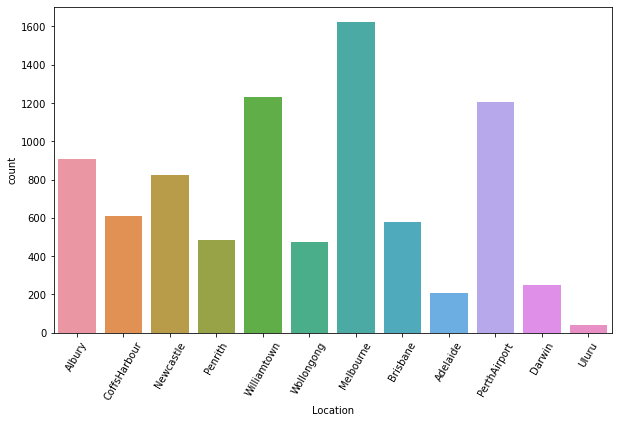

In [32]:
plt.figure(figsize=(10,6))
print(data['Location'].value_counts())
sns.countplot('Location', data=data)
plt.xticks(rotation=60)
plt.show()


From above observation we can see that Melbourne has 1622 records which is the highest of all followed by Williamtown with 1230, PerthAirport with 1204 and so on with Uluru has mere 39 records which is the lowest.

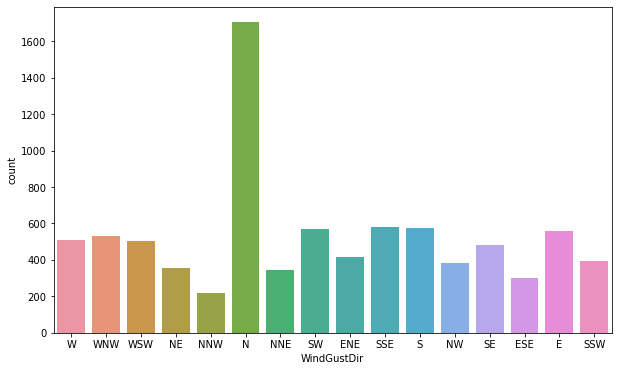

In [34]:
plt.figure(figsize=(10,6))
sns.countplot('WindGustDir', data=data)
plt.show()

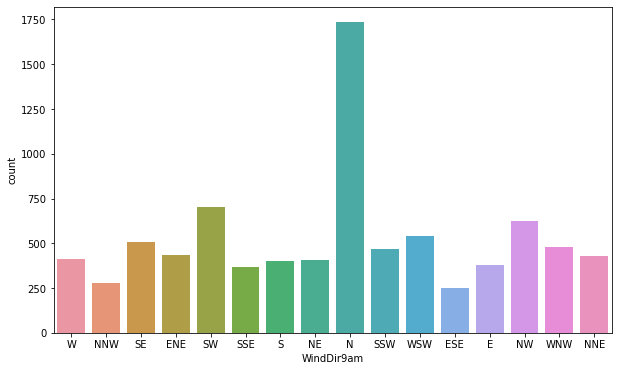

In [41]:
plt.figure(figsize=(10,6))
sns.countplot('WindDir9am', data=data)
plt.show()

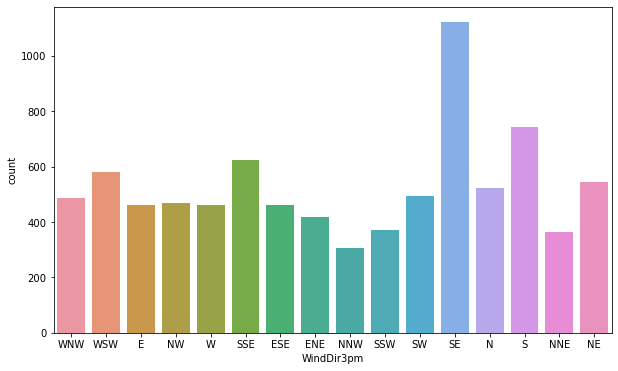

In [42]:
plt.figure(figsize=(10,6))
sns.countplot('WindDir3pm', data=data)
plt.show()

No     6435
Yes    1990
Name: RainToday, dtype: int64


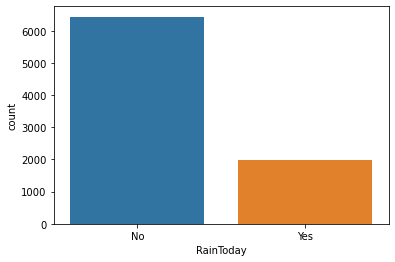

In [40]:
print(data['RainToday'].value_counts())

sns.countplot('RainToday', data=data)
plt.show()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


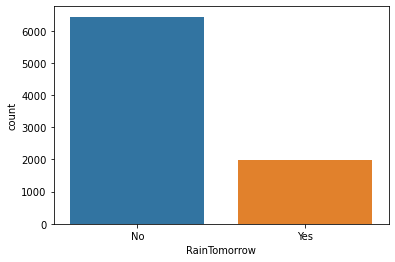

In [39]:
print(data['RainTomorrow'].value_counts())

sns.countplot('RainTomorrow', data=data)
plt.show()

We can observe that chances of rain tomorrow is low, i.e. No RainTomorrow has 6434 records while Yes RainTomorrow has 1991 records. There is imbalance in label classes.

<AxesSubplot:xlabel='Month', ylabel='count'>

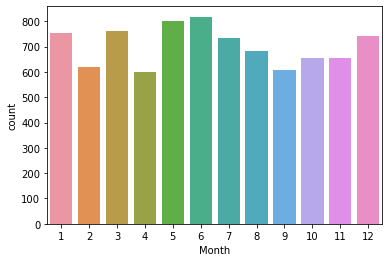

In [44]:
sns.countplot('Month', data=data)

 We can observe that maximum rain is recorded in june month

<AxesSubplot:xlabel='Year', ylabel='count'>

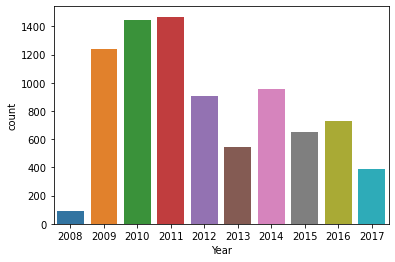

In [45]:
sns.countplot('Year', data=data)

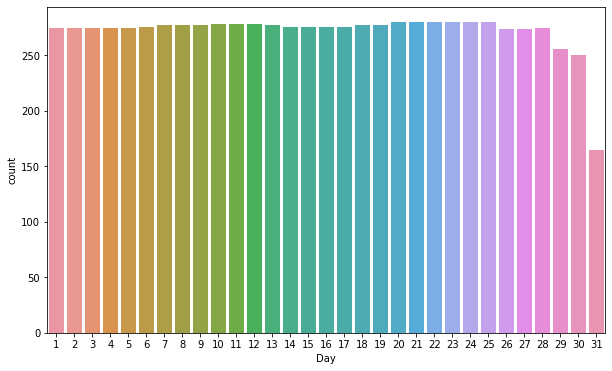

In [47]:
plt.figure(figsize=(10,6))
sns.countplot('Day',data=data)
plt.show()

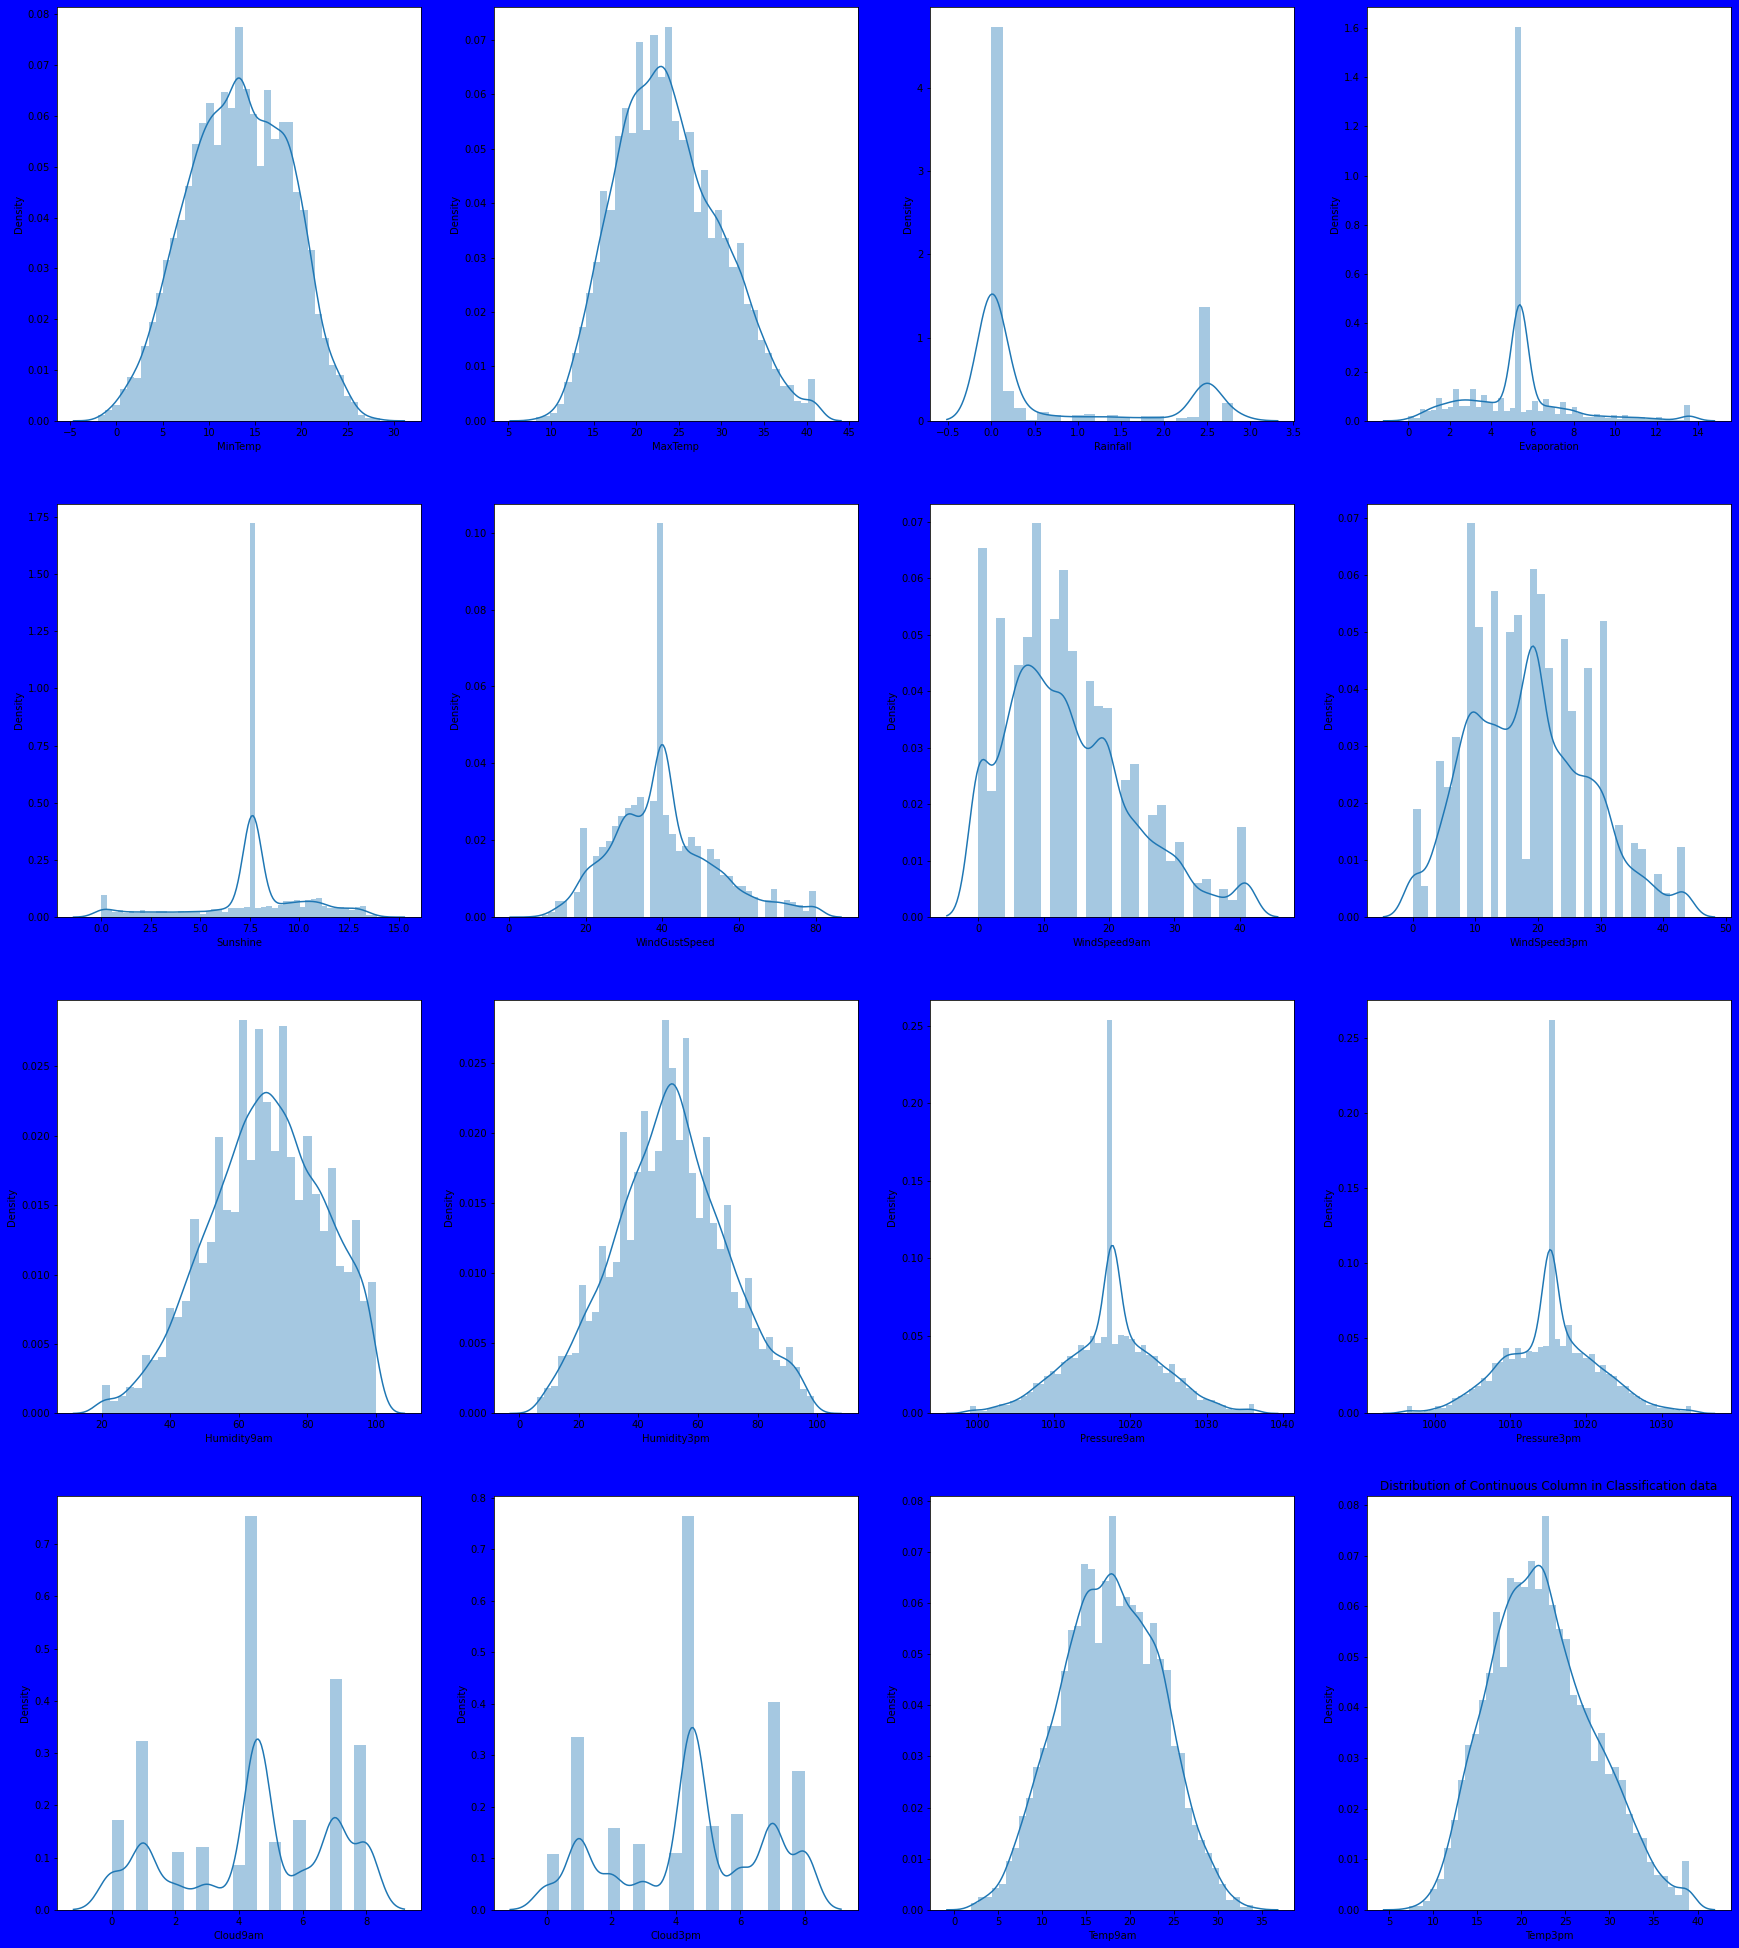

In [43]:
# Let's see distribution of continuous columns
# for Classification Model
num_data=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed',
          'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
          'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

plt.figure(figsize=(30,35), facecolor='blue')
plotnumber=1
for column in df_clf[num_data]:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_clf[column])
    plotnumber+=1

plt.title("Distribution of Continuous Column in Classification data")    
plt.show()

We can observe that our data for classification dataset is evenly distributed for most of the columns.



Let's visualize numerical data for Regression dataset, where our Label will be Rainfall.

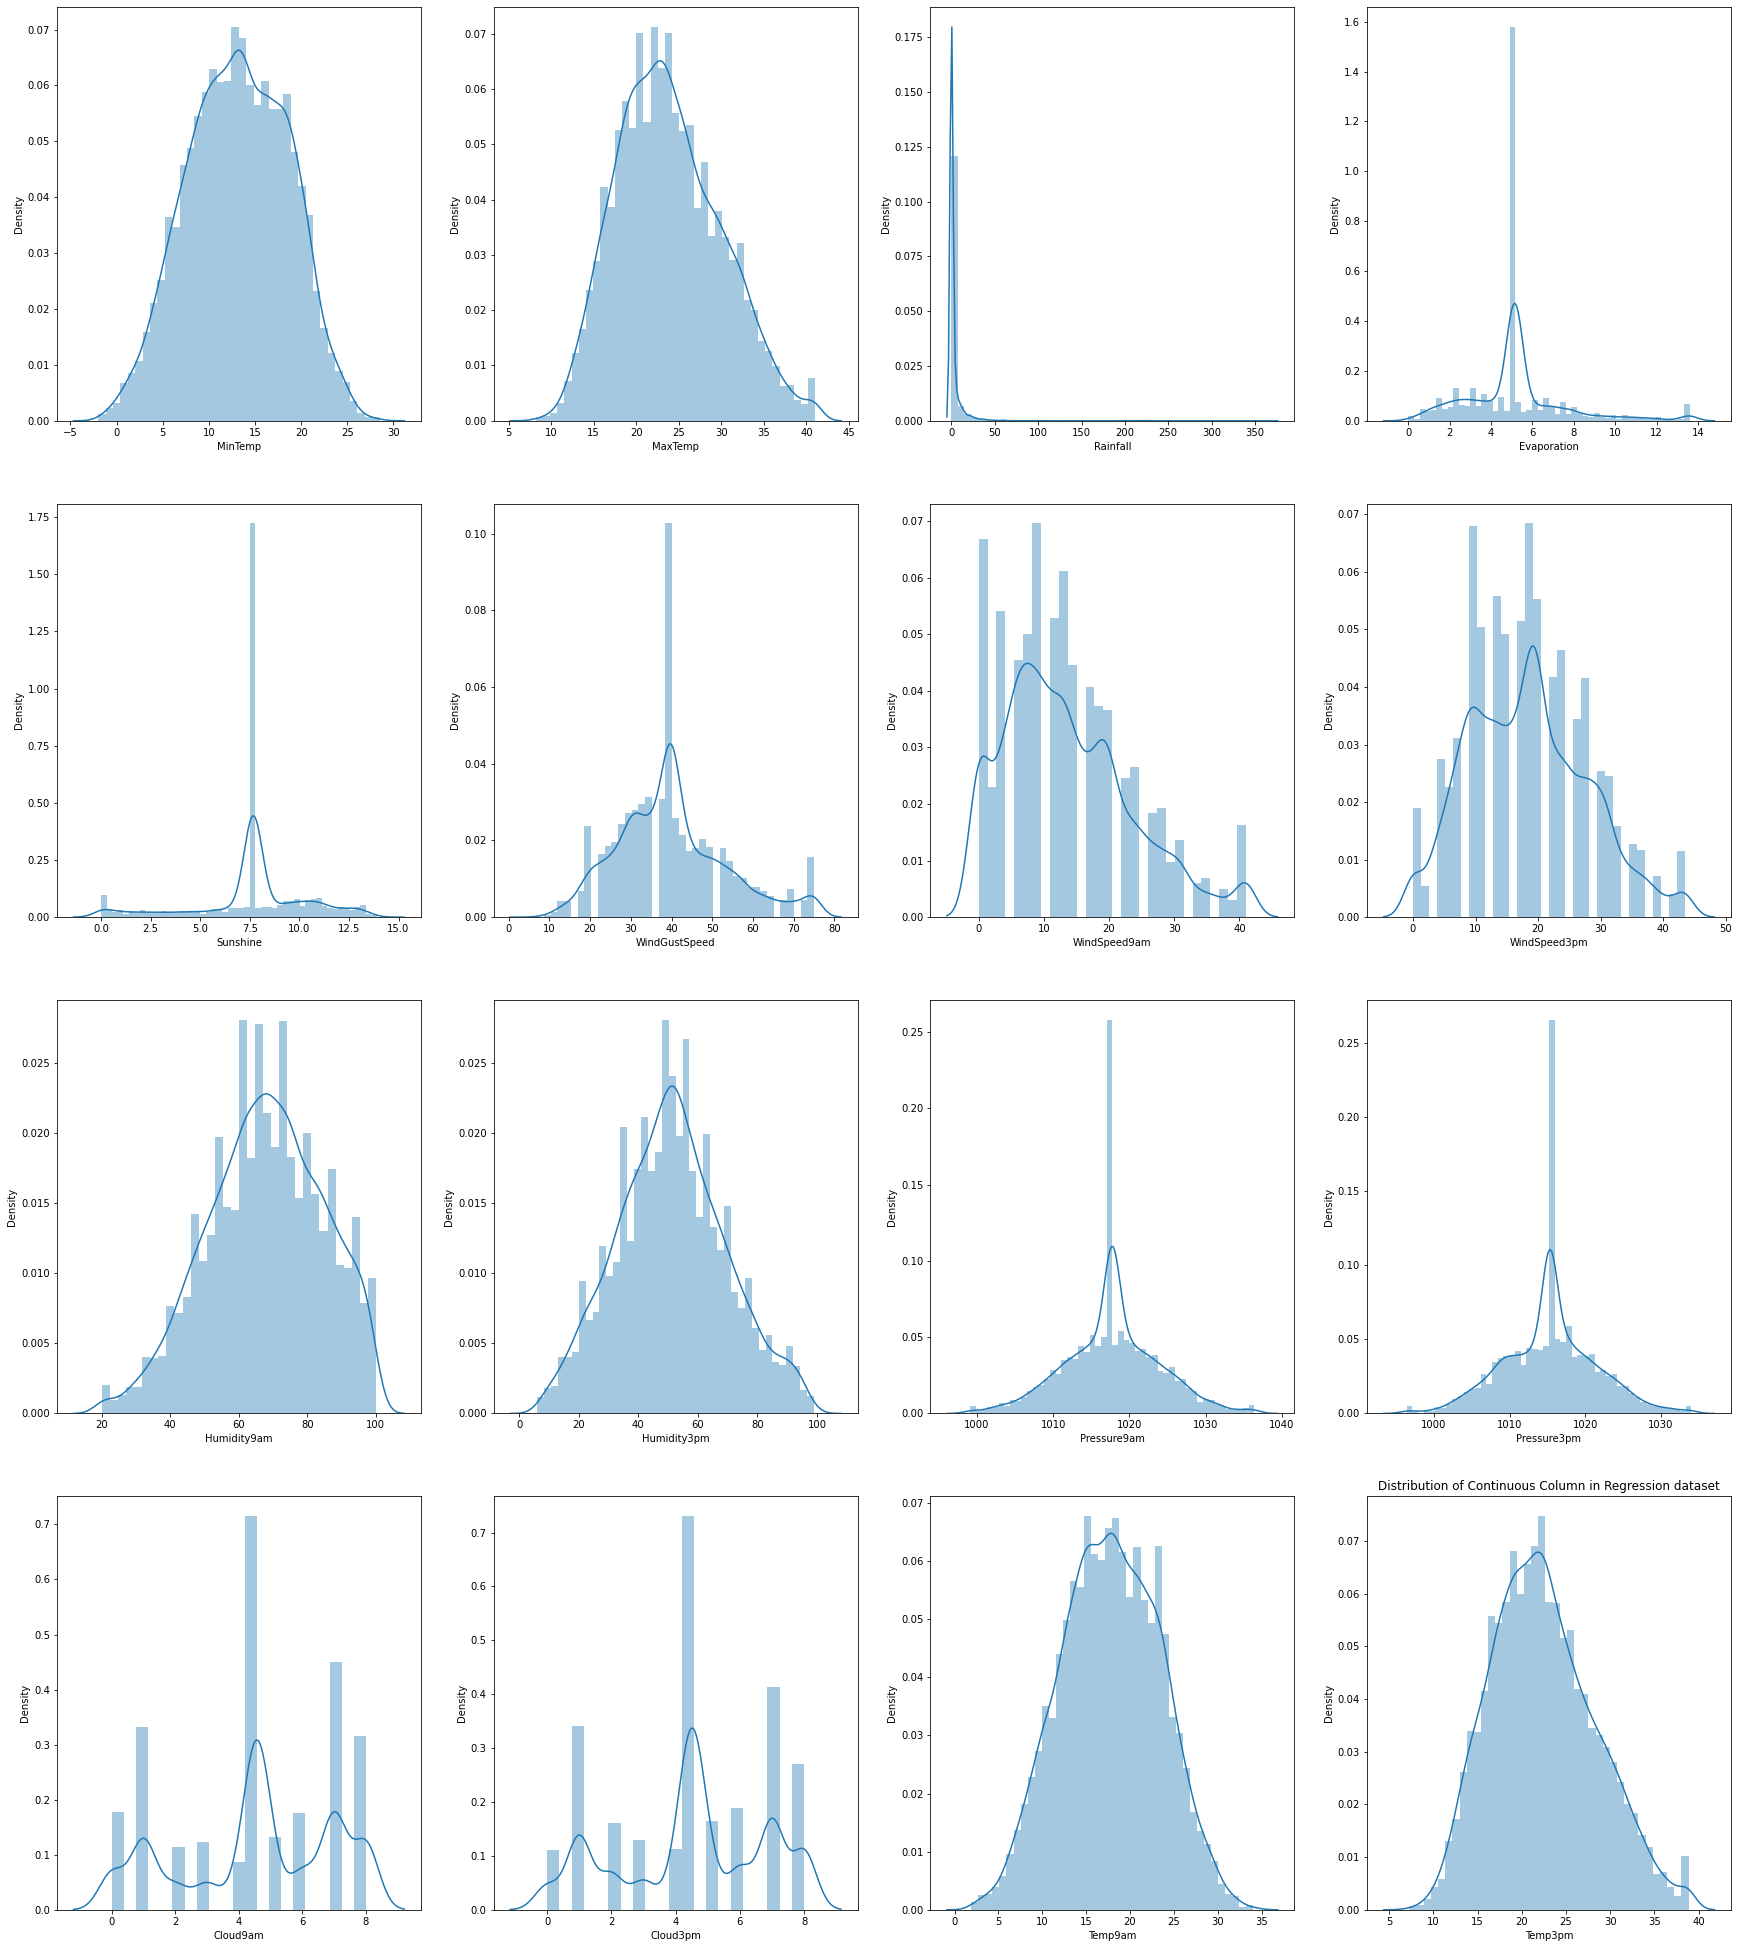

In [48]:
plt.figure(figsize=(30,35), facecolor='white')
plotnumber=1
for column in df_reg[num_data]:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_reg[column])
    plotnumber+=1

plt.title("Distribution of Continuous Column in Regression dataset")    
plt.show()

We can observe some outliers in Rainfall, but we cannot do anything about it as , it is our target column. Rest data looks fine, distribution of data looks good. I think we can move ahead with Multivariate analysis.

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

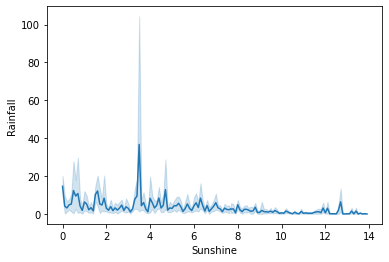

In [57]:
# Multivariate Analysis.

sns.lineplot(data=df_reg, x= 'Sunshine', y= 'Rainfall')

We can observe that as sunshine increases, the chances of rainfall decreases. We can say that they are inversely promotional.

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

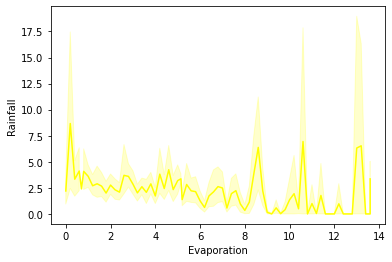

In [58]:
sns.lineplot(data=df_reg, x='Evaporation', y= 'Rainfall', color= 'yellow')

We can observe that Evaporation and Rainfall are also inversely proportional.

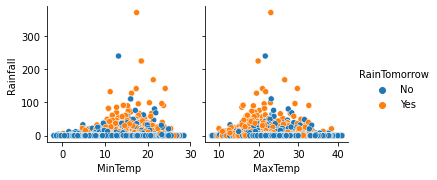

In [64]:
sns.pairplot(x_vars=['MinTemp','MaxTemp'], y_vars='Rainfall', hue='RainTomorrow',data= df_reg)

We can observe that chances of rain mostly happens when temperature range around 10-30. Greater the temperature chances of rainfall become less, same with lower the temperature chances are again less for rainfall.

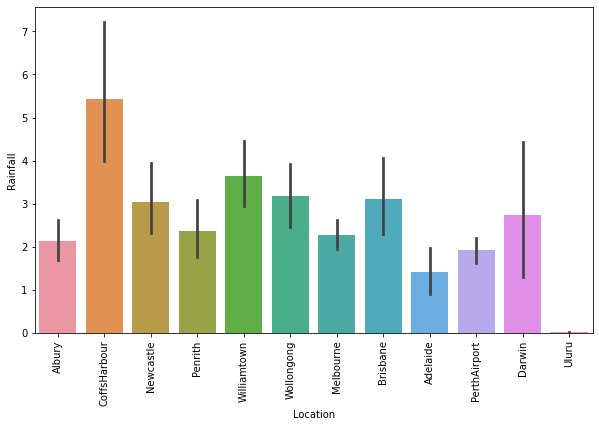

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(x='Location', y='Rainfall', data=df_reg)
plt.xticks(rotation= 90)
plt.show()

We can observe that CoffsHarbour registered highest rainfall, while Uluru records lowest rainfall

<AxesSubplot:xlabel='Month', ylabel='Rainfall'>

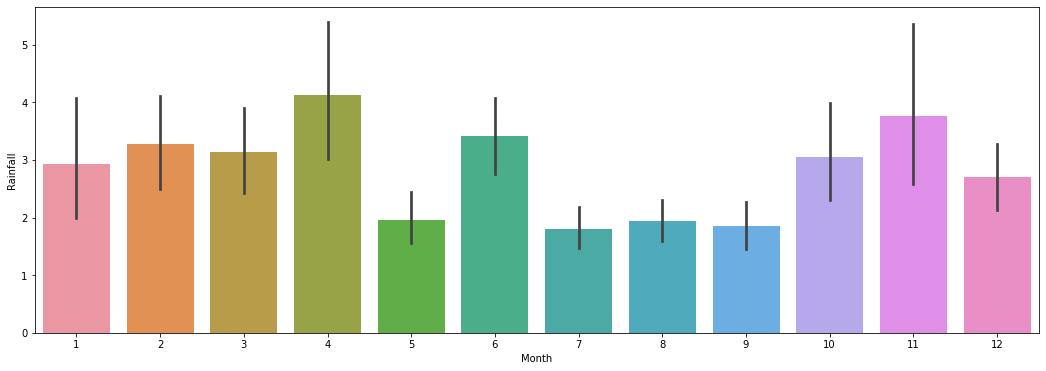

In [78]:
plt.figure(figsize=(18,6))
sns.barplot(x='Month', y='Rainfall', data=df_reg)

We can observe that basically April is the month when its mostly rainy, we can also say that, july , August, September, May are month with least rainy days. Looks like it's rainy season for Australia from late october to april.

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

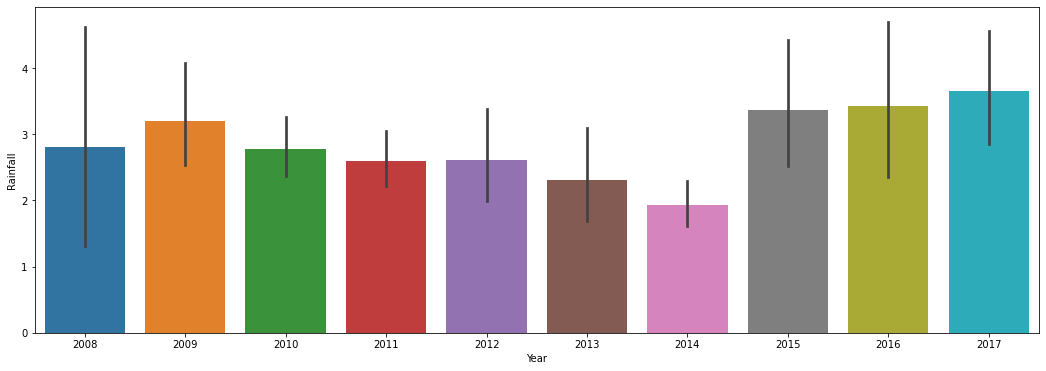

In [79]:
plt.figure(figsize=(18,6))
sns.barplot(x='Year',y='Rainfall', data=df_reg)

We can observe that Year 2014 registered least amount of rainfall, while upcoming years has good amount of rainfall. Specially 2017 registered highest rainfall.

<AxesSubplot:xlabel='Day', ylabel='Rainfall'>

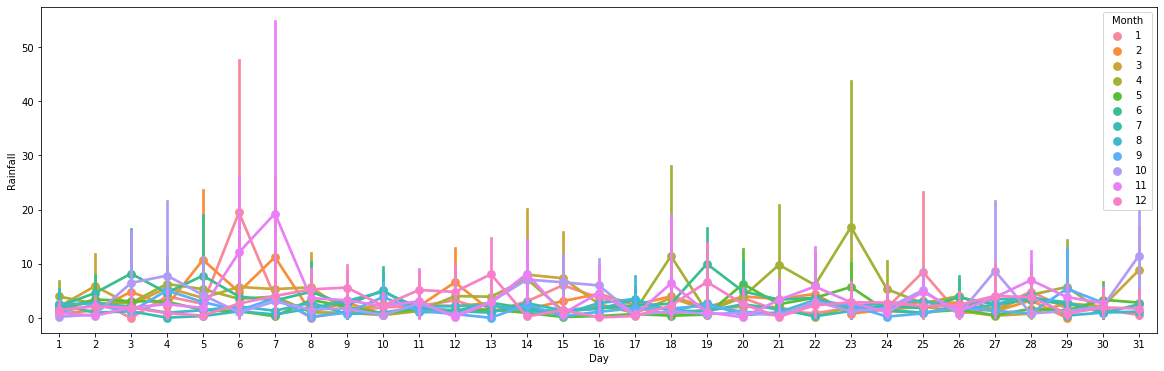

In [82]:
plt.figure(figsize=(20,6))
sns.pointplot(x='Day', y='Rainfall', hue='Month', data=df_reg)

We can observe that during April most of the rainfall recorded at the end of the month while during November and December, most of the rainfall recorded are in the first week.

<AxesSubplot:xlabel='WindGustDir', ylabel='Rainfall'>

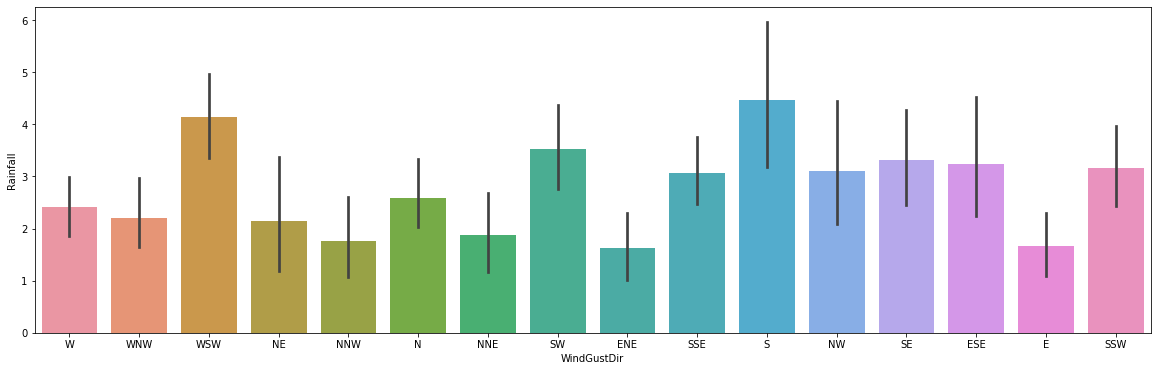

In [83]:
plt.figure(figsize=(20,6))
sns.barplot(x='WindGustDir', y='Rainfall', data=df_reg)

We can observe that Rainfall mostly happens when direction of strongly wind gust is S or WSW and less chances of rain happens when wind gust direction is E or ENE

<AxesSubplot:xlabel='RainToday', ylabel='Rainfall'>

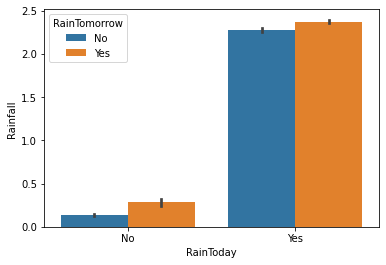

In [84]:
sns.barplot(x='RainToday', y='Rainfall', hue='RainTomorrow', data= df_clf)

We can observe that if it's not raining today, their is slight chance of rain tomorrow, And if raining today then the possibility of rain tomorrow is almost equal.

In [85]:
# let's check for correlation in regression dataset

df_reg.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
MinTemp,1.000000,0.718271,0.088553,0.374250,0.051778,0.233656,0.140655,0.182871,-0.131083,0.082494,-0.427924,-0.421808,0.089137,0.038917,0.888189,0.686471,0.032610,-0.262490,0.008899
MaxTemp,0.718271,1.000000,-0.088865,0.471373,0.377838,0.142093,0.014573,0.093535,-0.391573,-0.419295,-0.323657,-0.400195,-0.260718,-0.253212,0.866134,0.974200,0.107181,-0.176785,0.013578
Rainfall,0.088553,-0.088865,1.000000,-0.032217,-0.172683,0.085202,0.054857,0.026431,0.231781,0.238438,-0.071469,-0.031906,0.186559,0.151705,-0.007120,-0.092171,0.006530,-0.012522,-0.013953
Evaporation,0.374250,0.471373,-0.032217,1.000000,0.351706,0.212784,0.166847,0.136417,-0.333625,-0.244602,-0.258426,-0.271728,-0.118528,-0.149371,0.446159,0.458612,0.143980,-0.036107,0.011490
Sunshine,0.051778,0.377838,-0.172683,0.351706,1.000000,-0.008665,-0.015051,0.032215,-0.360039,-0.440644,0.017748,-0.040459,-0.542916,-0.558126,0.247640,0.396263,0.066251,-0.001150,-0.000558
WindGustSpeed,0.233656,0.142093,0.085202,0.212784,-0.008665,1.000000,0.604969,0.643027,-0.278670,-0.091451,-0.399958,-0.366230,0.021458,0.081768,0.206785,0.104159,-0.047236,0.042909,-0.001650
WindSpeed9am,0.140655,0.014573,0.054857,0.166847,-0.015051,0.604969,1.000000,0.567169,-0.362776,-0.108488,-0.173433,-0.137435,0.000032,0.059096,0.112295,-0.002284,-0.091229,0.032853,-0.004605
WindSpeed3pm,0.182871,0.093535,0.026431,0.136417,0.032215,0.643027,0.567169,1.000000,-0.259652,-0.089448,-0.250063,-0.206718,0.005702,0.008536,0.191945,0.070457,-0.061699,0.039934,-0.010052
Humidity9am,-0.131083,-0.391573,0.231781,-0.333625,-0.360039,-0.278670,-0.362776,-0.259652,1.000000,0.633706,0.147911,0.180399,0.407070,0.298609,-0.376749,-0.382332,0.103668,-0.118873,0.003689
Humidity3pm,0.082494,-0.419295,0.238438,-0.244602,-0.440644,-0.091451,-0.108488,-0.089448,0.633706,1.000000,-0.000269,0.069030,0.428732,0.442483,-0.126324,-0.488807,-0.026799,-0.074538,0.013718


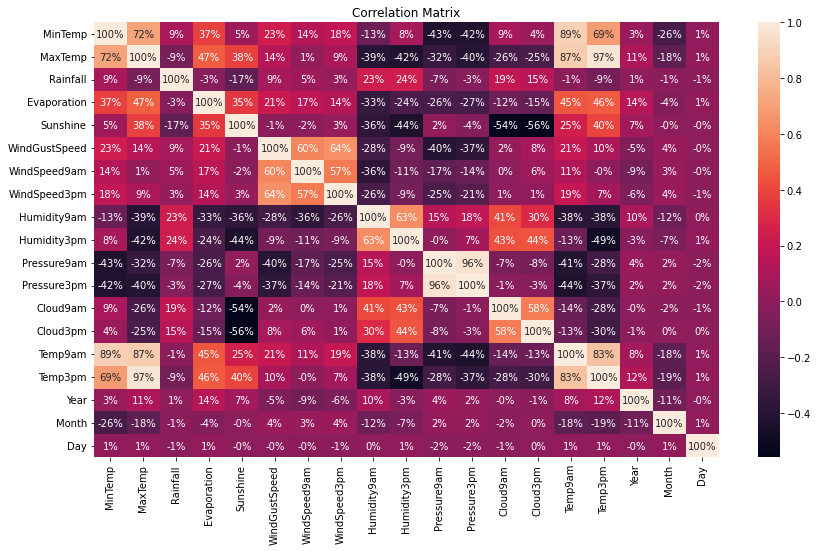

In [86]:
# Let's Visualize it using heat map
plt.figure(figsize=(14,8))
sns.heatmap(df_reg.corr(), annot= True, fmt='.0%')
plt.title("Correlation Matrix")
plt.show()

We can observe that Humidity is highly correlated with rainfall. We can also observe that few of the independent columns are also correlated Like Pressure9am- Pressure3pm, and Temp3pm - MaxTemp, and Temp9am -MinTemp. Looks like MultiColinearity is present in our dataset.

Let make sure using scatterplot

<AxesSubplot:xlabel='MaxTemp', ylabel='Temp3pm'>

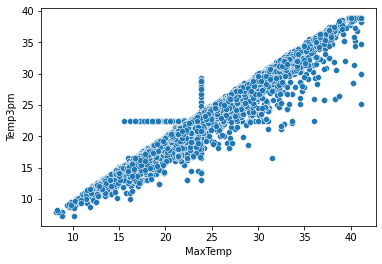

In [87]:
sns.scatterplot(x='MaxTemp', y='Temp3pm', data=df_reg)

They are most likely positively correlated, we need to drop one of them , in order to remove multicolinearity in our dataset.

<AxesSubplot:xlabel='MinTemp', ylabel='Temp9am'>

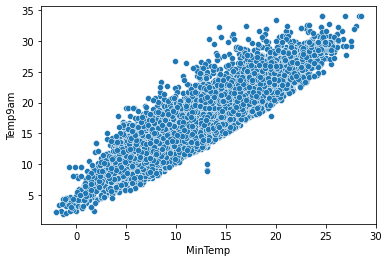

In [88]:
sns.scatterplot(x='MinTemp', y='Temp9am', data= df_reg)

We can observe similar trend here as well, both are positively correlated, as value for one increases , value of other also increases. We will drop one of them as well.


We can drop Temp9am and Temp3pm, as their correation with rainfall is comparitively low.

In [89]:
# Droping column from df_reg (Regression dataset) to remove Multicolinearity

df_reg.drop(columns=['Temp9am','Temp3pm'], axis=1, inplace= True)

#checking dimension
df_reg.shape

(8185, 23)

In [90]:
# Now to find correlation of features with RainTomorrow, we need to replace yes/ no with 1/0
# Replacing values of RainTomorrow and RainToday to numerical form

df_clf['RainTomorrow'].replace(to_replace='Yes', value=1, inplace=True)
df_clf['RainTomorrow'].replace(to_replace='No', value=0, inplace=True)

df_clf['RainToday'].replace(to_replace='Yes', value=1, inplace=True)
df_clf['RainToday'].replace(to_replace='No', value=0, inplace=True)

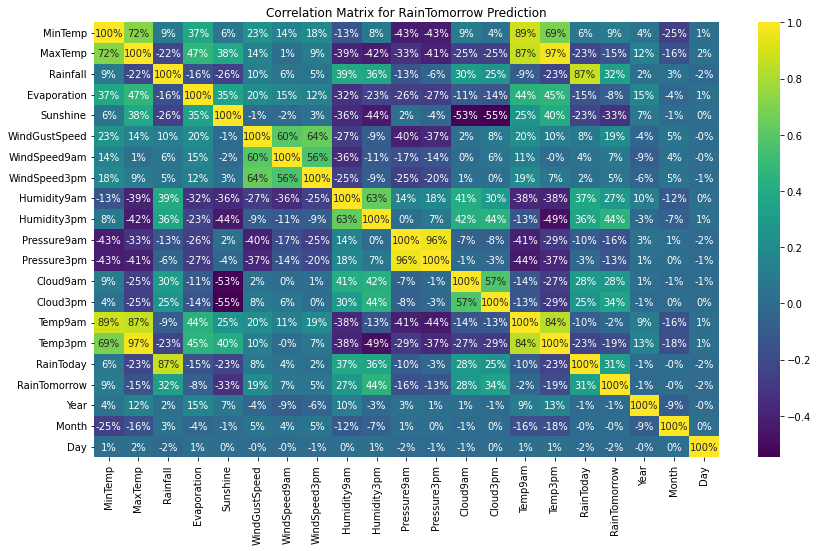

In [95]:
# Let's visualize Correlation matric of Classification dataset

plt.figure(figsize=(14,8))
sns.heatmap(df_clf.corr(), annot= True, fmt='.0%', cmap='viridis')
plt.title("Correlation Matrix for RainTomorrow Prediction")
plt.show()

We can observe that humidity here also is highly correlated to RainTomorrow. Also some of the features are highly correlated with each other, like Temp9am-MinTemp, and Temp3pm-MaxTemp, and RainToday-Rainfall, and Pressure9am-Pressure3pm.

Let's plot scatterplot to chcek for multicolinearity. As we already did same thing for Temp9am- MinTemp, and Temp3pm-MaxTemp, we are not performing the same thing, and simply drop Temp columns, and for rest two let's check correlation using scatterplot

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

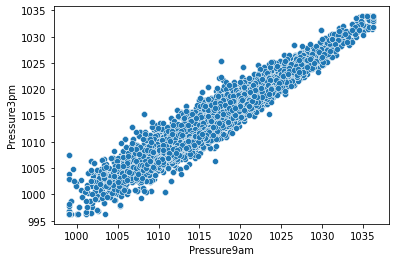

In [96]:
sns.scatterplot(x='Pressure9am', y='Pressure3pm', data=df_clf)

We can observe that both the columns are highly positively correlated, let's drop Pressure3pm, as its correlation with RainTomorrow is comparitively lower. 

<AxesSubplot:xlabel='RainToday', ylabel='Rainfall'>

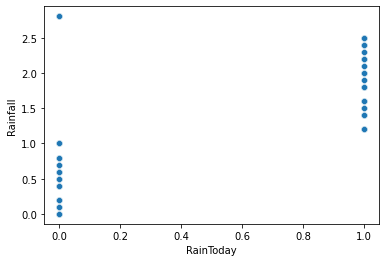

In [97]:
sns.scatterplot(x='RainToday', y='Rainfall', data=df_clf)

We don't see any direct correlation here, so let it be.

Now, let's move ahead and drop the correlated columns, so as to avoid multicolinearity in our model.

In [98]:
# Dropping columns
df_clf.drop(columns=['Temp9am','Temp3pm','Pressure3pm'], axis=1, inplace= True)

# chceking dimension
df_clf.shape

(8425, 22)

In [100]:
# Let's Drop column Pressure3pm from df_reg
df_reg.drop('Pressure3pm', axis=1, inplace=True)

df_reg.shape

(8185, 22)

So far, datsets looks good!! Let's move ahead with encoding the categorical columns.



# Encoding

In [101]:
df_clf.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Cloud9am         float64
Cloud3pm         float64
RainToday          int64
RainTomorrow       int64
Year               int64
Month              int64
Day                int64
dtype: object

Here we can see that in Classification dataset where we need to Predict RainTomorrow, we have 4 categorical columns left, and to encode them we will use label encoder as they are Nominal data, and it works well here.


Following columns are going to be encoded by label encoder : 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'

In [102]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()
df_clf['Location']=lab_enc.fit_transform(df_clf['Location'])
df_clf['WindGustDir']= lab_enc.fit_transform(df_clf['WindGustDir'])
df_clf['WindDir9am']=lab_enc.fit_transform(df_clf['WindDir9am'])
df_clf['WindDir3pm']=lab_enc.fit_transform(df_clf['WindDir3pm'])

In [103]:
df_clf.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,71.0,22.0,1007.7,8.000000,4.503183,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,44.0,25.0,1010.6,4.566622,4.503183,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,38.0,30.0,1007.6,4.566622,2.000000,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,45.0,16.0,1017.6,4.566622,4.503183,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,82.0,33.0,1010.8,7.000000,8.000000,0,0,2008,12,5


Looks Good!!, Now do same thing with regression dataset, will replace YES/No with 1/0 and rest columns we will label transform

In [104]:
df_reg.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Cloud9am         float64
Cloud3pm         float64
RainToday         object
RainTomorrow      object
Year               int64
Month              int64
Day                int64
dtype: object

In [105]:
# Let's start with RainToday and RainTomorrow
# Replacing values of RainTomorrow and RainToday to numerical form

df_reg['RainTomorrow'].replace(to_replace='Yes', value=1, inplace=True)
df_reg['RainTomorrow'].replace(to_replace='No', value=0, inplace=True)

df_reg['RainToday'].replace(to_replace='Yes', value=1, inplace=True)
df_reg['RainToday'].replace(to_replace='No', value=0, inplace=True)

df_reg.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,5.144006,7.675679,W,44.0,W,WNW,...,71.0,22.0,1007.7,8.000000,4.498137,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,5.144006,7.675679,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,4.548371,4.498137,0,0,2008,12,2


In [106]:
# Let's encode remaining categorical columns using label encoder
df_reg['Location']=lab_enc.fit_transform(df_reg['Location'])
df_reg['WindGustDir']= lab_enc.fit_transform(df_reg['WindGustDir'])
df_reg['WindDir9am']=lab_enc.fit_transform(df_reg['WindDir9am'])
df_reg['WindDir3pm']=lab_enc.fit_transform(df_reg['WindDir3pm'])

In [107]:
df_reg.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,5.144006,7.675679,13,44.0,13,14,...,71.0,22.0,1007.7,8.000000,4.498137,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.144006,7.675679,14,44.0,6,15,...,44.0,25.0,1010.6,4.548371,4.498137,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.144006,7.675679,15,46.0,13,15,...,38.0,30.0,1007.6,4.548371,2.000000,0,0,2008,12,3


Since our dataset's are encoded, now let's check for skewness and outliers



# Skewness and Outlier Detection and Removal

In [108]:
# Classification dataset
df_clf.skew()

Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.358988
Rainfall         1.102761
Evaporation      0.907787
Sunshine        -0.716525
WindGustDir      0.119640
WindGustSpeed    0.619726
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am     0.737551
WindSpeed3pm     0.334774
Humidity9am     -0.241038
Humidity3pm      0.118281
Pressure9am      0.008462
Cloud9am        -0.366503
Cloud3pm        -0.276294
RainToday        1.242362
RainTomorrow     1.241588
Year             0.418663
Month            0.039388
Day              0.004260
dtype: float64

As skewness and outlier's chcek is only for continuous features , we will left categorical features and Labels untouched.
Here, keeping threshold value for skewness as  +/-0.5 following columns has skewness present.

'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am'. rest are either categorical columns or labels with value greater then threshold.

In [109]:
# Let's do Power Transform to remove skewness.
from sklearn.preprocessing import PowerTransformer
pwrTrans=PowerTransformer(method='yeo-johnson')  
feature_conti=['Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am']
df_clf[feature_conti]=pwrTrans.fit_transform(df_clf[feature_conti].values)

In [110]:
df_clf.skew()

Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.358988
Rainfall         0.773721
Evaporation      0.062795
Sunshine        -0.075544
WindGustDir      0.119640
WindGustSpeed    0.004993
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am    -0.104555
WindSpeed3pm     0.334774
Humidity9am     -0.241038
Humidity3pm      0.118281
Pressure9am      0.008462
Cloud9am        -0.366503
Cloud3pm        -0.276294
RainToday        1.242362
RainTomorrow     1.241588
Year             0.418663
Month            0.039388
Day              0.004260
dtype: float64

We can see that skewness has been reduced significantly. Let's move ahead and chcek for outliers, we will use Z score method for that.

In [111]:
# for Outliers Dection and removal we will use Z- Score Method
from scipy import stats
feature=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed',
          'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Cloud9am','Cloud3pm']

df_out=pd.DataFrame(df_clf[feature])
z= np.abs(stats.zscore(df_out))
threshold = 3
print(np.where(z>3))

(array([2346, 2373, 2389, 2710, 2738, 2743, 2744, 2768], dtype=int64), array([5, 5, 5, 5, 5, 5, 5, 5], dtype=int64))


In [113]:
# Removing outliers from the data frame, and storing final value in df_out Dataframe.
df_out= df_clf[(z<3).all(axis=1)]
df_out.shape                            # checking the shape of dataframe after removing outliers 

(8417, 22)

Now our classification dataset is clean and ready to use for model Building, let's perform similar operations for regression dataset.

In [115]:
# chceking skewness
df_reg.skew()

Location         -0.048193
MinTemp          -0.078225
MaxTemp           0.360417
Rainfall         13.028837
Evaporation       1.051399
Sunshine         -0.735757
WindGustDir       0.128931
WindGustSpeed     0.559941
WindDir9am        0.170898
WindDir3pm       -0.112017
WindSpeed9am      0.746465
WindSpeed3pm      0.344634
Humidity9am      -0.235477
Humidity3pm       0.121251
Pressure9am       0.008580
Cloud9am         -0.353091
Cloud3pm         -0.273169
RainToday         1.197839
RainTomorrow      1.249812
Year              0.425323
Month             0.049817
Day               0.000970
dtype: float64

We can observe that our target column here i.e 'Rainfall' itself is highly skewed, but we will not distrub it. So let's move ahead with continuous columns other than label with values more them +/-0.5. So following columns in which we will remove skewness are : 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am'.

In [116]:
# Let's do power transform to remove skewness
f_conti=['Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am']
df_reg[f_conti]=pwrTrans.fit_transform(df_reg[f_conti].values)

In [117]:
# for Outliers Dection and removal we will use Z- Score Method
from scipy import stats
feature=['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed',
          'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Cloud9am','Cloud3pm']

df_outlier=pd.DataFrame(df_reg[feature])
z= np.abs(stats.zscore(df_outlier))
threshold = 3
print(np.where(z>3))

(array([1377, 2322, 2349, 2365, 2683, 2711, 2716, 2717, 2741, 4972, 5013,
       5029, 5030, 5723, 5764, 5780, 5781, 6381, 6888, 7254], dtype=int64), array([2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64))


In [118]:
# Removing outliers from the data frame, and storing final value in df_out Dataframe.
df_outlier= df_reg[(z<3).all(axis=1)]
df_outlier.shape                            # checking the shape of dataframe after removing outliers 

(8165, 22)

df_out is our Classification dataset final output. While df_outlier is our regression dataset final result.

Dataset's are more uniform now, let's move ahead and scale the dataset before Model Building.



# Scaling

In [120]:
# we will use standard scalar for scaling.
# Let's separate features and label.

#Classification dataset
X_clf= df_out.drop('RainTomorrow', axis=1)
y_clf= df_out.RainTomorrow

# Scaling features
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_clf_scaled=scalar.fit_transform(X_clf)

In [121]:
print(X_clf_scaled.shape)
print(y_clf.shape)

(8417, 21)
(8417,)


In [122]:
# Regression dataset Scaling
X_reg= df_outlier.drop('Rainfall', axis=1)
y_reg= df_outlier.Rainfall


# Scaling features
X_reg_scaled=scalar.fit_transform(X_reg)

In [123]:
print(X_reg_scaled.shape)
print(y_reg.shape)

(8165, 21)
(8165,)


Since both of our dataset are scaled, Let's check for multicolinearity using VIF

# VIF

In [124]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

Finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/1-R2): here R2=actual-predicted ,this method help us to identify multicollinearity.

In [127]:
# for classification dataset
vif=pd.DataFrame()
vif["vif"]= [variance_inflation_factor(X_clf_scaled,i) for i in range(X_clf_scaled.shape[1])]
vif["Features"]=X_clf.columns

#let's check the values
vif

,vif,Features
0,1.584738,Location
1,4.575050,MinTemp
2,5.397334,MaxTemp
3,4.105068,Rainfall
4,1.544049,Evaporation
5,2.020318,Sunshine
6,1.592255,WindGustDir
7,2.308015,WindGustSpeed
8,1.336578,WindDir9am
9,1.427948,WindDir3pm


We can see that values are well under 10, so multicolinearity level is not so high to worry about, we can safely move ahaed with model building.



# Classification Model Building

In [128]:
# importing basic library
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

In [129]:
# splitting test and train data, considering test data to be 25%

x_train,x_test, y_train,y_test= train_test_split(X_clf_scaled, y_clf, test_size=0.25)

# Logistic Regression

In [132]:
# importing the library
from sklearn.linear_model import LogisticRegression
# model
LR= LogisticRegression()


maxAccu=0   # maximum accuracy
maxRS=0    #best random state value for which max accuracy is achieved

# Determing Best random_state, for maximum accuracy/

for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(X_clf_scaled,y_clf,test_size=0.25, random_state=i)
    LR.fit(x_train,y_train)   #fitting the data will train your model
    Y_pred=LR.predict(x_test)    # this is predicted target variable
    acc= accuracy_score(y_test,Y_pred)   # accuracy score
    print('Accuracy ', acc, 'Random state ', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Max accuracy ", maxAccu, " at random state ", i)
    

print("Best accuracy is ", maxAccu, "at random state ", maxRS)


Accuracy  0.8280285035629453 Random state  1
Max accuracy  0.8280285035629453  at random state  1
Accuracy  0.8247030878859858 Random state  2
Accuracy  0.8375296912114014 Random state  3
Max accuracy  0.8375296912114014  at random state  3
Accuracy  0.8185273159144894 Random state  4
Accuracy  0.8294536817102138 Random state  5
Accuracy  0.8247030878859858 Random state  6
Accuracy  0.8294536817102138 Random state  7
Accuracy  0.8199524940617577 Random state  8
Accuracy  0.8332541567695962 Random state  9
Accuracy  0.8232779097387174 Random state  10
Accuracy  0.8342042755344418 Random state  11
Accuracy  0.8318289786223277 Random state  12
Accuracy  0.828978622327791 Random state  13
Accuracy  0.8403800475059382 Random state  14
Max accuracy  0.8403800475059382  at random state  14
Accuracy  0.8190023752969121 Random state  15
Accuracy  0.8375296912114014 Random state  16
Accuracy  0.8294536817102138 Random state  17
Accuracy  0.8375296912114014 Random state  18
Accuracy  0.8351543942

Accuracy  0.8232779097387174 Random state  176
Accuracy  0.8228028503562945 Random state  177
Accuracy  0.8308788598574822 Random state  178
Accuracy  0.8237529691211402 Random state  179
Accuracy  0.8294536817102138 Random state  180
Accuracy  0.8422802850356295 Random state  181
Accuracy  0.8270783847980998 Random state  182
Accuracy  0.8242280285035629 Random state  183
Accuracy  0.8394299287410927 Random state  184
Accuracy  0.831353919239905 Random state  185
Accuracy  0.8299287410926366 Random state  186
Accuracy  0.8465558194774346 Random state  187
Accuracy  0.831353919239905 Random state  188
Accuracy  0.8370546318289787 Random state  189
Accuracy  0.836104513064133 Random state  190
Accuracy  0.8204275534441805 Random state  191
Accuracy  0.8408551068883611 Random state  192
Accuracy  0.8375296912114014 Random state  193
Accuracy  0.8356294536817103 Random state  194
Accuracy  0.8294536817102138 Random state  195
Accuracy  0.8389548693586698 Random state  196
Accuracy  0.8266

Best accuracy is  0.8489311163895487 at random state  171

In [133]:
# creating train test split for best random state
x_train,x_test,y_train,y_test= train_test_split(X_clf_scaled,y_clf,test_size=0.25, random_state=171)

pred=LR.predict(x_train)
LR_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {LR_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=LR.predict(x_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
LR_acc= accuracy_score(y_test,y_pred)

=====================Train Result========================
Accuracy Score : 82.49%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                      0            1  accuracy    macro avg  weighted avg
precision     0.850644     0.694015  0.824937     0.772330      0.813249
recall        0.934027     0.477107  0.824937     0.705567      0.824937
f1-score      0.890388     0.565474  0.824937     0.727931      0.812814
support    4805.000000  1507.000000  0.824937  6312.000000   6312.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[4488  317]
 [ 788  719]]

=====================Test Result========================
Accuracy Score : 85.17814726840855%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                      0           1  accuracy    macro avg  weighted avg
precision     0.873858    0.742210  0.851781     0.808034      0.843651
recall        0.943896 

In [134]:
# Cross Validation

from sklearn.model_selection import cross_val_score

# validating accuracy

scr= cross_val_score(LR, X_clf_scaled, y_clf,scoring='precision' ,cv=10)
LR_scr=scr.mean()
print("Cross Validation Score For Logistic Regression model : ", LR_scr)

Cross Validation Score For Logistic Regression model :  0.6928837548434595


We took precision as score for cross validation as our label is sightly imbalance, and its important  to know how precise our output is.



# Ensemble Model

In [135]:
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier()

RF.fit(x_train,y_train)
pred=RF.predict(x_train)
RF_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {RF_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=RF.predict(x_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
RF_acc=accuracy_score(y_test,y_pred)

=====================Train Result========================
Accuracy Score : 100.00%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                 0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    4805.0  1507.0       1.0     6312.0        6312.0


-----------------------------------------------------------
Confusion Matrix : 
 [[4805    0]
 [   0 1507]]

=====================Test Result========================
Accuracy Score : 89.97624703087887%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                      0           1  accuracy    macro avg  weighted avg
precision     0.908039    0.861702  0.899762     0.884871      0.897407
recall        0.967941    0.670807  0.899762     0.819374      0.899762
f1-score  

In [137]:
# Cross validation
scr= cross_val_score(RF,X_clf_scaled,y_clf,scoring='precision', cv=10)
RF_scr=scr.mean()
print("Cross validation Score of RandomForestClassifier model is : ", RF_scr)

Cross validation Score of RandomForestClassifier model is :  0.8669913386201384


In [143]:
# Hyper Parameter Tunning Randome forest Classifier
from sklearn.model_selection import GridSearchCV
RandomForestClassifier()
#creating parameter list to pass in GridSearchCV
parameters={'max_features': ['auto','sqrt','log2'],
           'n_estimators': [1,10,60,70,100],
            'max_depth': range(5,15,3),
            'criterion': ['gini','entropy']}

GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring= "accuracy")
GCV.fit(x_train,y_train)    #fitting data into model
GCV.best_params_  # printing best parameter found by GridSearchCV

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'sqrt',
 'n_estimators': 60}

In [144]:
GCV_pred=GCV.best_estimator_.predict(x_test)   #predicting using best parameters
accuracy_score(y_test, GCV_pred)   # checking the accuracy



0.896437054631829

In [145]:
from sklearn.metrics import precision_score
precision_score(y_test,GCV_pred)

0.8711484593837535

I think this is our model, as we got good precision score, accuracy score, confusion matrix also looks good. let's make one more model just to confirm


# SVC

In [148]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_train)
svc_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {svc_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=svc.predict(x_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
svc_acc=accuracy_score(y_test,y_pred)


=====================Train Result========================
Accuracy Score : 87.40%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                      0            1  accuracy    macro avg  weighted avg
precision     0.879160     0.847656  0.874049     0.863408      0.871639
recall        0.967534     0.575979  0.874049     0.771756      0.874049
f1-score      0.921233     0.685895  0.874049     0.803564      0.865045
support    4805.000000  1507.000000  0.874049  6312.000000   6312.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[4649  156]
 [ 639  868]]

=====================Test Result========================
Accuracy Score : 85.7957244655582%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                      0           1  accuracy    macro avg  weighted avg
precision     0.870588    0.787500  0.857957     0.829044      0.851523
recall        0.958076  

In [149]:
# Cross validation

scr= cross_val_score(svc,X_clf_scaled,y_clf,scoring= 'precision', cv=10)
svc_scr=scr.mean()
print("Cross validation Score of SVC model is : ", scr.mean())

Cross validation Score of SVC model is :  0.739360669724596


In [151]:
# Hyper parameter tuning
SVC()
from sklearn.model_selection import GridSearchCV

# selecting for parameters
param_grid= { 'C': [1,3,5,10],
            'gamma' : [.001,.01,.002,.02,.1]}

GCV=GridSearchCV(SVC(), param_grid, cv=5, scoring= "accuracy")
GCV.fit(x_train,y_train)    #fitting data into model
GCV.best_params_  # printing best parameter found by GridSearchCV


{'C': 3, 'gamma': 0.1}

In [152]:
GCV_pred=GCV.best_estimator_.predict(x_test)   #predicting using best parameters
accuracy_score(y_test, GCV_pred)  

0.8788598574821853

In [153]:
precision_score(y_test,GCV_pred)   # checking precision score

0.7688679245283019

In [154]:
# summarizing the Models on the basis of accuracy  and cross validation using presion as scoring.
# we are taking precision as the cross validation parameter as we want to know how correctly our model is able to detect the class

Accuracy=[LR_acc, RF_acc, svc_acc]
Cross_valid=[LR_scr, RF_scr, svc_scr]


Model= pd.DataFrame({
    'Models':['Logistic Regression','Random Forest Classifier', 'SVC'], 
    'Accuracy Score': Accuracy, 
    'Cross Validation Score(Precision)': Cross_valid})

Model.sort_values(by ='Cross Validation Score(Precision)', ascending = False )

,Models,Accuracy Score,Cross Validation Score(Precision)
1,Random Forest Classifier,0.899762,0.866991
2,SVC,0.857957,0.739361
0,Logistic Regression,0.851781,0.692884


Random Forest works better with good precision score as well, so this will be our final model. Let's go ahaed and save it.



# Saving Classification Model

In [155]:
# Pickeling of file or serialization of a file.

import joblib
joblib.dump(RF, "Rainfall_Project_predicting_RainTomorrow.pkl")

['Rainfall_Project_predicting_RainTomorrow.pkl']

Our classification model is save, now let's work for other part of the problem statement.

Let's do model building for our regression dataset, where the label is Rainfall. We need to predict amount of rainfall.

We already scaled our data, so let's go ahead and start model building.



# Regression Model Building

In [166]:
# spliting train and test data, considering 20% for test data
X_train, X_test,Y_train,Y_test=train_test_split(X_reg_scaled,y_reg,test_size=0.25,random_state=41)

# Linear Regression

In [167]:

# importing libraries and metrics
 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# ML Model
L_R= LinearRegression()

#fit
L_R.fit(X_train,Y_train)

#predict
y_pred= L_R.predict(X_test)
pred=L_R.predict(X_train)

print("--------- Train score---------")
LR_train_MAE= round(mean_absolute_error(Y_train, pred), 2)
LR_train_MSE= round(mean_squared_error(Y_train, pred), 2)
LR_train_R2= round(r2_score(Y_train, pred), 4)


print(f" Mean Absolute Error : {LR_train_MAE}\n")
print(f" Mean Squared Error : {LR_train_MSE}\n")
print(f" R^2 Score : {LR_train_R2}\n")


#score variables
LR_MAE= round(mean_absolute_error(Y_test, y_pred), 2)
LR_MSE= round(mean_squared_error(Y_test, y_pred), 2)
LR_R2= round(r2_score(Y_test, y_pred), 4)

print("---------------Test Score-------------")
print(f" Mean Absolute Error : {LR_MAE}\n")
print(f" Mean Squared Error : {LR_MSE}\n")
print(f" R^2 Score : {LR_R2}\n")


--------- Train score---------
 Mean Absolute Error : 3.25

 Mean Squared Error : 96.28

 R^2 Score : 0.2162

---------------Test Score-------------
 Mean Absolute Error : 3.11

 Mean Squared Error : 46.2

 R^2 Score : 0.3403



In [171]:
# Cross validation
scores= cross_val_score(L_R, X_reg_scaled, y_reg, scoring='r2', cv=5)
LR_CS=scores.mean()
print("Cross validation score is : ", LR_CS)

Cross validation score is :  0.24415287725347543


We can clearly see that linear regression is not able to provide us with desired level of scores, so let's see how ensemble technique is useful for us.



# Ensemble Technique

In [170]:
from sklearn.ensemble import RandomForestRegressor

#Model
RFR= RandomForestRegressor()

#fit 
RFR.fit(X_train, Y_train)

#predict
y_pred=RFR.predict(X_test)
pred=RFR.predict(X_train)

#score variables
print("--------- Train score---------")
RF_train_MAE= round(mean_absolute_error(Y_train, pred), 2)
RF_train_MSE= round(mean_squared_error(Y_train, pred), 2)
RF_train_R2= round(r2_score(Y_train, pred), 4)


print(f" Mean Absolute Error : {RF_train_MAE}\n")
print(f" Mean Squared Error : {RF_train_MSE}\n")
print(f" R^2 Score : {RF_train_R2}\n")

print("--------- Test score---------")
RFR_MAE= round(mean_absolute_error(Y_test, y_pred), 2)
RFR_MSE= round(mean_squared_error(Y_test, y_pred), 2)
RFR_R2= round(r2_score(Y_test, y_pred), 4)


print(f" Mean Absolute Error : {RFR_MAE}\n")
print(f" Mean Squared Error : {RFR_MSE}\n")
print(f" R^2 Score : {RFR_R2}\n")


--------- Train score---------
 Mean Absolute Error : 0.75

 Mean Squared Error : 10.15

 R^2 Score : 0.9174

--------- Test score---------
 Mean Absolute Error : 1.94

 Mean Squared Error : 40.71

 R^2 Score : 0.4187



In [172]:
# cross validation
RFR= RandomForestRegressor()
scores= cross_val_score(RFR, X_reg_scaled, y_reg, scoring='r2', cv=10)
RFR_CS=scores.mean()
print("Cross validation score is : ", RFR_CS)

Cross validation score is :  0.4988299196395185


# LASSO

In [177]:
from sklearn.linear_model import Lasso
#model
LS=Lasso(alpha=0.05)
#fit 
LS.fit(X_train,Y_train)

#predict
y_pred= LS.predict(X_test)
pred=LS.predict(X_train)

#score variables
print("--------- Train score---------")
LS_train_MAE= round(mean_absolute_error(Y_train, pred), 2)
LS_train_MSE= round(mean_squared_error(Y_train, pred), 2)
LS_train_R2= round(r2_score(Y_train, pred), 4)


print(f" Mean Absolute Error : {LS_train_MAE}\n")
print(f" Mean Squared Error : {LS_train_MSE}\n")
print(f" R^2 Score : {LS_train_R2}\n")


#score variables
LS_MAE= round(mean_absolute_error(Y_test, y_pred), 2)
LS_MSE= round(mean_squared_error(Y_test, y_pred), 2)
LS_R2= round(r2_score(Y_test, y_pred), 4)
LS_RMSE=round(np.sqrt(mean_squared_error(Y_test,y_pred)),4)
print("\n-------------------Test Score-------------------\n")
print(f" Mean Absolute Error : {LS_MAE}\n")
print(f" Mean Squared Error : {LS_MSE}\n")
print(f" R^2 Score : {LS_R2}\n")
print(f" Root Mean Squared Error : {LS_RMSE}\n")


--------- Train score---------
 Mean Absolute Error : 3.14

 Mean Squared Error : 96.39

 R^2 Score : 0.2154


-------------------Test Score-------------------

 Mean Absolute Error : 2.99

 Mean Squared Error : 46.0

 R^2 Score : 0.3432

 Root Mean Squared Error : 6.782



In [181]:
# Cross validation

scores= cross_val_score(LS, X_reg_scaled, y_reg, scoring='r2', cv=10)
LS_CS=scores.mean()
print("Cross validation score is : ", LS_CS)

Cross validation score is :  0.25952773137244234


# Boosting

In [178]:
import xgboost as xgb

#Model
xgb= xgb.XGBRegressor()

#fit 
xgb.fit(X_train, Y_train)

#predict
Y_pred=xgb.predict(X_test)
pred=xgb.predict(X_train)

#score variables
print("--------- Train score---------")
xgb_train_MAE= round(mean_absolute_error(Y_train, pred), 2)
xgb_train_MSE= round(mean_squared_error(Y_train, pred), 2)
xgb_train_R2= round(r2_score(Y_train, pred), 4)


print(f" Mean Absolute Error : {xgb_train_MAE}\n")
print(f" Mean Squared Error : {xgb_train_MSE}\n")
print(f" R^2 Score : {xgb_train_R2}\n")

print("--------- Test score---------")
xgb_MAE= round(mean_absolute_error(Y_test, Y_pred), 2)
xgb_MSE= round(mean_squared_error(Y_test, Y_pred), 2)
xgb_R2= round(r2_score(Y_test, Y_pred), 4)


print(f" Mean Absolute Error : {xgb_MAE}\n")
print(f" Mean Squared Error : {xgb_MSE}\n")
print(f" R^2 Score : {xgb_R2}\n")


--------- Train score---------
 Mean Absolute Error : 0.4

 Mean Squared Error : 0.72

 R^2 Score : 0.9941

--------- Test score---------
 Mean Absolute Error : 1.95

 Mean Squared Error : 44.97

 R^2 Score : 0.3579



In [180]:
# cross validation
scores= cross_val_score(xgb, X_reg_scaled, y_reg, scoring='r2', cv=10)
xgb_CS=scores.mean()
print("Cross validation score is : ", xgb_CS)

Cross validation score is :  0.4742787621860501


In [182]:
# let's summarize each models to make final decision and perform hyper parameter tuning 

MAE=[LR_MAE,RFR_MAE,xgb_MAE,LS_MAE]
MSE=[LR_MSE,RFR_MSE,xgb_MSE,LS_MSE]
R2= [LR_R2,RFR_R2,xgb_R2,LS_R2]
Cross_score= [LR_CS,RFR_CS,xgb_CS,LS_CS]

Model= pd.DataFrame({
    'Models':['Linear Regression', 'Random Forest Regressor', 'XGBRegressor', 'Lasso'],
    'MAE': MAE, 'MSE' :MSE, 'R^2' :R2, 'Cross Validation Score': Cross_score })

Model.sort_values(by ='MAE', ascending = True )


,Models,MAE,MSE,R^2,Cross Validation Score
1,Random Forest Regressor,1.94,40.71,0.4187,0.498830
2,XGBRegressor,1.95,44.97,0.3579,0.474279
3,Lasso,2.99,46.00,0.3432,0.259528
0,Linear Regression,3.11,46.20,0.3403,0.244153


We can summarize that RandomForest Regressor is our final model for our regression dataset. Let's go ahead and do some hyper parameter tuning

In [187]:
# Hyper parameter tuning of Randomforest Regressor

# Hyper parameter tuning for RandomForestRegressor model

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

RFR= RandomForestRegressor()

#determining what algorithm and parameter works better.
param_grid= {'n_estimators': [50,80,100],
            'criterion': ['squared_error', 'absolute_error','poisson'],
             'max_depth': [4,9,13],
             'min_samples_leaf':[1,2,6,8],
            'n_jobs': [1,4,10]}

rnd_srch=RandomizedSearchCV(RandomForestRegressor(), cv=5, param_distributions= param_grid)

rnd_srch.fit(X_train,Y_train)


rnd_srch.best_estimator_

#grid_search=GridSearchCV(estimator=RFR, param_grid= param_grid, cv=5)

#grid_search.fit(X_train,Y_train)

#grid_search.best_estimator_


RandomForestRegressor(max_depth=13, min_samples_leaf=6, n_estimators=50,
                      n_jobs=10)

In [188]:
rnd_pred= rnd_srch.best_estimator_.predict(X_test)   # predicting with best para meters
print("Accuracy post tuning \n")
print(r2_score(Y_test, rnd_pred))
print("\nPost tuning MAE\n")
print(mean_absolute_error(Y_test,rnd_pred))

Accuracy post tuning 

0.4709874129639705

Post tuning MAE

1.9952632573885873


Since it's randomized search Cv , the value will vary in every run. We took randomized searchCV for hyper parameter tuning because it is fastest. 

We can observe that our scores are not so great, as our label data is highly skewed. We did Hyper parameter tuning for best Regression model , for our dataset it is RandomForest Regressor. 

Let's go ahead and save it.




# Regression Model saving

In [189]:
# Saving Best Performing Model
import joblib
joblib.dump(RFR, "Rainfall_Prediction_Model.pkl")

['Rainfall_Prediction_Model.pkl']